In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
print(f"GPU name {tf.test.gpu_device_name()}")

GPU name /device:GPU:0


# Sequence modelling

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [3]:
# Import imdb

from tensorflow.keras.datasets import imdb

In [26]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data()

#### Inspect the dataset

In [5]:
# Inspect the type of the data

type(x_train)


numpy.ndarray

In [6]:
# Inspect the shape of the data

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [7]:
# Display the first dataset element input
# Notice encoding

print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
# Display the first dataset element output
print(y_train[0])


1


#### Load dataset with different options

In [9]:
# Load the dataset with defaults

imdb.load_data(path="imbd.npr", index_from=3)

# ~/.keras/dataset/

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [10]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=500)

((array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 

In [ ]:
# Ignore the top 10 most frequent words using skip_top
imdb.load_data(skip_top=10, num_words=1000, oov_char=2)


In [ ]:
# Limit the sequence lengths to 500 using maxlen
imdb.load_data(maxlen=500)


In [ ]:
# Use '1' as the character that indicates the start of a sequence
imdb.load_data(start_char=1)


#### Explore the dataset word index

In [11]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [25]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}


In [17]:
# Retrieve a specific word's index

imdb_word_index["simpsonian"]

imdb_word_index["single"]

686

In [30]:
# View an input sentence
imdb_word_index = imdb.get_word_index()
inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[ inv_imdb_word_index[index] for index in x_train[0] if index > index_from ]


['as',
 'you',
 'with',
 'out',
 'themselves',
 'powerful',
 'lets',
 'loves',
 'their',
 'becomes',
 'reaching',
 'had',
 'journalist',
 'of',
 'lot',
 'from',
 'anyone',
 'to',
 'have',
 'after',
 'out',
 'atmosphere',
 'never',
 'more',
 'room',
 'titillate',
 'it',
 'so',
 'heart',
 'shows',
 'to',
 'years',
 'of',
 'every',
 'never',
 'going',
 'villaronga',
 'help',
 'moments',
 'or',
 'of',
 'every',
 'chest',
 'visual',
 'movie',
 'except',
 'her',
 'was',
 'several',
 'of',
 'enough',
 'more',
 'with',
 'is',
 'now',
 'current',
 'film',
 'as',
 'you',
 'of',
 'mine',
 'potentially',
 'unfortunately',
 'of',
 'you',
 'than',
 'him',
 'that',
 'with',
 'out',
 'themselves',
 'her',
 'get',
 'for',
 'was',
 'camp',
 'of',
 'you',
 'movie',
 'sometimes',
 'movie',
 'that',
 'with',
 'scary',
 'but',
 'pratfalls',
 'to',
 'story',
 'wonderful',
 'that',
 'in',
 'seeing',
 'in',
 'character',
 'to',
 'of',
 '70s',
 'musicians',
 'with',
 'heart',
 'had',
 'shadows',
 'they',
 'of',

In [31]:
# Get the sentiment value
y_train[0]


1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [32]:
# Load the imdb data set
(x_train, y_train), (x_test, y_test) = imdb.load_data()


#### Preprocess the data with padding

In [33]:
# Inspect the input data shape

x_train.shape

(25000,)

In [36]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                                maxlen=300,
                                                                padding='post',
                                                                truncating='pre',
                                                                value=0)

In [37]:
# Inspect the output data shape
padded_x_train.shape


(25000, 300)

#### Create a Masking layer

In [38]:
# Import numpy
import numpy as np



In [39]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, axis=-1)


In [40]:
# Create a Masking layer
tf_x_train = tf.convert_to_tensor(padded_x_train, dtype="float32")
masking_layer = tf.keras.layers.Masking(mask_value=0.0)


In [41]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [42]:
# Look at the dataset

masked_x_train

<tf.Tensor: shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [43]:
# Look at the ._keras_mask for the dataset
masked_x_train._keras_mask


<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

The Embedding Layer provides a mapping function from input sequences to a higher-dimensional space, often used for representing words or categorical variables. Key features include reducing data complexity, preserving relationships within data, and enhancing machine learning models' performance.

#### Create and apply an `Embedding` layer

In [44]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501,
                                            output_dim=16 ,
                                            input_length=300)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [45]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequance_of_indices = tf.constant([[[0], [1], [5], [500]]])
sequance_of_embeddings = embedding_layer(sequance_of_indices)
sequance_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.04095696,  0.03182398, -0.02980524, -0.04765824,
           0.0275805 , -0.02761391, -0.0421123 ,  0.01549696,
          -0.01016821,  0.01327993,  0.04363736,  0.03925744,
           0.01701104,  0.02097023,  0.03551365, -0.04713137]],

        [[-0.04229544,  0.02718431, -0.04113208, -0.00184553,
           0.00245782, -0.03748805, -0.04026677,  0.02190061,
          -0.01558435,  0.00983107, -0.00471441, -0.03441367,
          -0.00550095,  0.01188846, -0.02362381,  0.01320605]],

        [[-0.03164111,  0.01714083, -0.03184059, -0.04548488,
          -0.0428131 , -0.02091736, -0.04860292, -0.02638682,
          -0.02750168,  0.0129005 ,  0.03611023,  0.02230132,
          -0.02575581,  0.02886401, -0.01209673, -0.01583766]],

        [[ 0.04772265,  0.02499669, -0.04271298, -0.03778453,
           0.00495239, -0.03701895, -0.03762849, -0.00419746,
          -0.03097781, -0.01309248, -0.04132343,  0.02739061,
      

In [47]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[-0.04095696,  0.03182398, -0.02980524, ...,  0.02097023,
         0.03551365, -0.04713137],
       [-0.04229544,  0.02718431, -0.04113208, ...,  0.01188846,
        -0.02362381,  0.01320605],
       [-0.01102119,  0.01529938,  0.03165487, ..., -0.03305554,
        -0.00730478, -0.03703099],
       ...,
       [ 0.01654253,  0.03152848, -0.01356554, ...,  0.03165406,
        -0.01690903,  0.04812494],
       [-0.00649792, -0.03993592,  0.03179151, ...,  0.01058649,
        -0.02048597, -0.02888364],
       [ 0.04772265,  0.02499669, -0.04271298, ...,  0.0186081 ,
         0.04261491, -0.00458604]], dtype=float32)

In [48]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14, :]

array([-0.0291034 ,  0.00407884,  0.04883614,  0.01899794,  0.04260438,
       -0.03343017, -0.00765789,  0.00385811, -0.02314748,  0.04929518,
       -0.03794412, -0.04768069, -0.03375907,  0.03429936, -0.03839274,
       -0.04437029], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [49]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501,
                                                     output_dim=16 ,
                                                     input_length=300,
                                                     mask_zero=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequance_of_embeddings = masking_embedding_layer(sequance_of_indices)
masked_sequance_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [51]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)

    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [53]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()


In [54]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [55]:
# Get the word index

imdb_word_index = get_imdb_word_index()

In [56]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [58]:
# View the first dataset example sentence

[ inv_imdb_word_index[index] for index in x_train[0] if index > 2 ]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',
 'was',
 'so',
 'sad',


#### Build an Embedding layer into a model

In [59]:
# Get the maximum token value

max_index_value = max([max(sequence) for sequence in x_train])

In [61]:
# Specify an embedding dimension

embeddeding_dim = 16

In [63]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value + 1,
                              output_dim=embeddeding_dim,
                              mask_zero=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [64]:
# Functional API refresher: use the Model to build the same model

review_sequences = tf.keras.layers.Input(shape=(None,))
embedding_sequance = tf.keras.layers.Embedding(input_dim=max_index_value + 1,
                                               output_dim=embeddeding_dim,
                                               mask_zero=False)(review_sequences)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequance)
prediction = tf.keras.layers.Dense(1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequences, outputs=prediction)


In [65]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, None, 16)            │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,017 (625.07 KB)

 Trainable params: 160,017 (625.07 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile, train, and evaluate the model

In [68]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5097 - loss: 0.6970 - val_accuracy: 0.4844 - val_loss: 0.6979
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5153 - loss: 0.6921 - val_accuracy: 0.4406 - val_loss: 0.6921
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5527 - loss: 0.6856 - val_accuracy: 0.6625 - val_loss: 0.6707
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5735 - loss: 0.6751 - val_accuracy: 0.5031 - val_loss: 0.6890
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6248 - loss: 0.6517 - val_accuracy: 0.6031 - val_loss: 0.6318


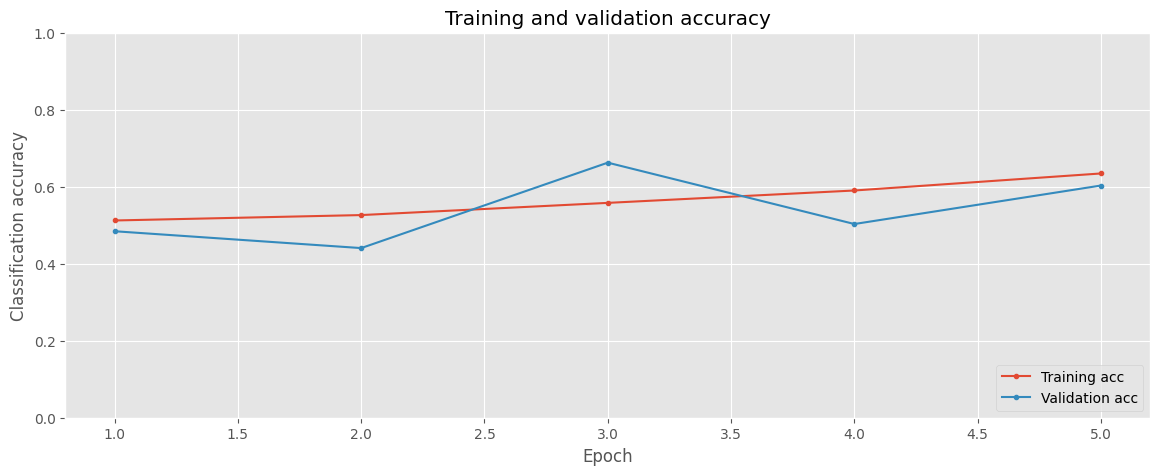

In [70]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [72]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]


In [79]:
# Save the word Embeddings to tsv files
# Two files:
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
  if token < len(weights):
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')

    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1

out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [80]:
# Create a SimpleRNN layer and test it

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [84]:
# Note that only the final cell output is returned

sequance = tf.constant([[[1, 1], [2, 2], [3, 3]]])
layer_output = simplernn_layer(sequance)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[ 0.69009525, -0.60259485, -0.31840777, -0.7969791 , -0.23855904,
        -0.959698  ,  0.990741  , -0.13127293,  0.9952899 , -0.83704793,
        -0.35439378, -0.9895341 ,  0.99682033, -0.48622662,  0.9041912 ,
        -0.98468655]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [103]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)

    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [104]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [105]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [106]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()


#### Create a recurrent neural network model

In [107]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

max_index_value

10000

In [111]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value + 1,
                              output_dim=embedding_dim,
                              mask_zero=True),
    tf.keras.layers.LSTM(units=16, use_cudnn=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#### Compile and fit the model

In [112]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
536/536 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.6840 - loss: 0.5726
Epoch 2/3
536/536 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9078 - loss: 0.2430
Epoch 3/3
536/536 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9394 - loss: 0.1712


#### Plot learning curves

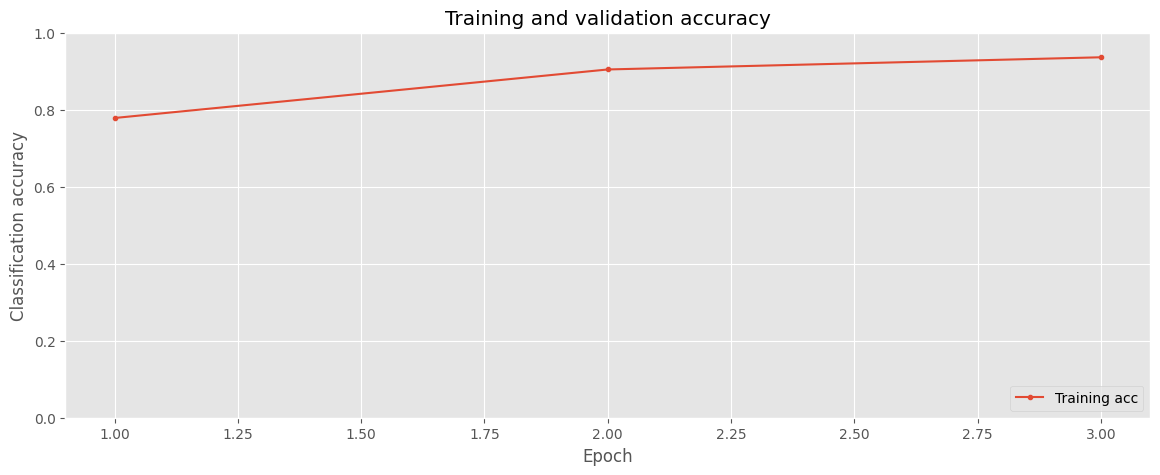

In [116]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
#val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
#val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
#plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [117]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[ inv_imdb_word_index[index] for index in x_test[0] if index > 2 ]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [118]:
# Get the model prediction using model.predict()
model.predict(x_test[None, 0, :])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


array([[0.01884958]], dtype=float32)

In [119]:
# Get the corresponding label

y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [120]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)

    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [121]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

In [122]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [124]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [ ]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [125]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value + 1,
                              output_dim=embedding_dim,
                              mask_zero=True),
    tf.keras.layers.LSTM(units=32, use_cudnn=False, return_sequences=True),
    tf.keras.layers.LSTM(units=32, use_cudnn=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [127]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value + 1,
                              output_dim=embedding_dim,
                              mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8, use_cudnn=False), merge_mode='sum',
                                  backward_layer=tf.keras.layers.GRU(units=8, go_backwards=True)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [131]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value + 1,
                              output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8, use_cudnn=False, return_sequences=True),  merge_mode='concat'),
    tf.keras.layers.GRU(units=8, return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#### Compile and fit the model

In [132]:
# Compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [134]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/3
536/536 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9140 - loss: 0.2288 - val_accuracy: 0.8609 - val_loss: 0.3329
Epoch 2/3
536/536 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9408 - loss: 0.1661 - val_accuracy: 0.8547 - val_loss: 0.3636
Epoch 3/3
536/536 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9550 - loss: 0.1308 - val_accuracy: 0.8094 - val_loss: 0.4915


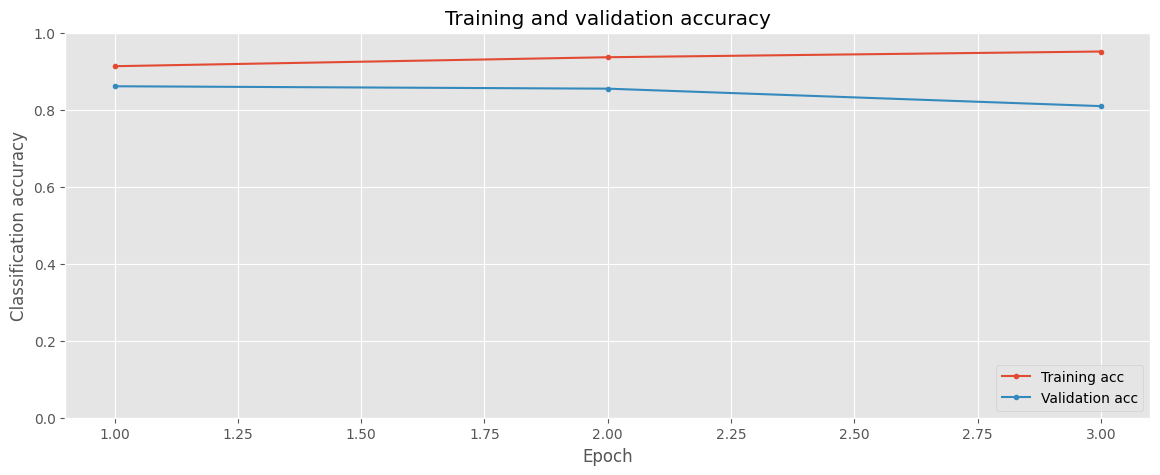

In [135]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);